In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
df_1 = pd.read_csv('Men ODI Team Match Results - 20th Century.csv')
df_2 = pd.read_csv('Men ODI Team Match Results - 21st Century .csv')

In [113]:
df = pd.concat([df_1, df_2])

In [115]:
df.dropna()

,Result,Margin,Match,Home/Away,Ground,Match Date,Match Month,Match Year,Match Period,Matches,Country
0,Lost,5 wickets,Australia v England,Away,Melbourne,1971/01/05,Jan,1971,Jan 1971,1,England
1,Won,6 wickets,England v Australia,Home,Manchester,1972/08/24,Aug,1972,Aug 1972,1,England
2,Lost,5 wickets,England v Australia,Home,Lord's,1972/08/26,Aug,1972,Aug 1972,1,England
3,Won,2 wickets,England v Australia,Home,Birmingham,1972/08/28,Aug,1972,Aug 1972,1,England
4,Won,7 wickets,England v New Zealand,Home,Swansea,1973/07/18,Jul,1973,Jul 1973,1,England
...,...,...,...,...,...,...,...,...,...,...,...
5165,Lost,3 wickets,Afghanistan v Pakistan,Home,Leeds,2019/06/29,Jun,2019,Jun 2019,1,Afghanistan
5166,Lost,23 runs,Afghanistan v West Indies,Home,Leeds,2019/07/04,Jul,2019,Jul 2019,1,Afghanistan
5167,Lost,7 wickets,Afghanistan v West Indies,Home,Lucknow,2019/11/06,Nov,2019,Nov 2019,1,Afghanistan
5168,Lost,47 runs,Afghanistan v West Indies,Home,Lucknow,2019/11/09,Nov,2019,Nov 2019,1,Afghanistan


In [117]:
# We do not want to remove duplicates , because eng vs aus should also appear as aus v eng
# df.drop_duplicates(subset=['Ground','Match Date'])
df.shape

(8541, 11)

In [119]:
#Splitting the match columns into team and opposition
df[['team','opposition']] = df['Match'].str.split(' v ',expand = True)

In [121]:
df

,Result,Margin,Match,Home/Away,Ground,Match Date,Match Month,Match Year,Match Period,Matches,Country,team,opposition
0,Lost,5 wickets,Australia v England,Away,Melbourne,1971/01/05,Jan,1971,Jan 1971,1,England,Australia,England
1,Won,6 wickets,England v Australia,Home,Manchester,1972/08/24,Aug,1972,Aug 1972,1,England,England,Australia
2,Lost,5 wickets,England v Australia,Home,Lord's,1972/08/26,Aug,1972,Aug 1972,1,England,England,Australia
3,Won,2 wickets,England v Australia,Home,Birmingham,1972/08/28,Aug,1972,Aug 1972,1,England,England,Australia
4,Won,7 wickets,England v New Zealand,Home,Swansea,1973/07/18,Jul,1973,Jul 1973,1,England,England,New Zealand
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5165,Lost,3 wickets,Afghanistan v Pakistan,Home,Leeds,2019/06/29,Jun,2019,Jun 2019,1,Afghanistan,Afghanistan,Pakistan
5166,Lost,23 runs,Afghanistan v West Indies,Home,Leeds,2019/07/04,Jul,2019,Jul 2019,1,Afghanistan,Afghanistan,West Indies
5167,Lost,7 wickets,Afghanistan v West Indies,Home,Lucknow,2019/11/06,Nov,2019,Nov 2019,1,Afghanistan,Afghanistan,West Indies
5168,Lost,47 runs,Afghanistan v West Indies,Home,Lucknow,2019/11/09,Nov,2019,Nov 2019,1,Afghanistan,Afghanistan,West Indies


In [123]:
#Keep only won and lost
df = df [(df['Result'] =='Won') | (df['Result'] =='Lost')]


In [125]:
df

,Result,Margin,Match,Home/Away,Ground,Match Date,Match Month,Match Year,Match Period,Matches,Country,team,opposition
0,Lost,5 wickets,Australia v England,Away,Melbourne,1971/01/05,Jan,1971,Jan 1971,1,England,Australia,England
1,Won,6 wickets,England v Australia,Home,Manchester,1972/08/24,Aug,1972,Aug 1972,1,England,England,Australia
2,Lost,5 wickets,England v Australia,Home,Lord's,1972/08/26,Aug,1972,Aug 1972,1,England,England,Australia
3,Won,2 wickets,England v Australia,Home,Birmingham,1972/08/28,Aug,1972,Aug 1972,1,England,England,Australia
4,Won,7 wickets,England v New Zealand,Home,Swansea,1973/07/18,Jul,1973,Jul 1973,1,England,England,New Zealand
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5165,Lost,3 wickets,Afghanistan v Pakistan,Home,Leeds,2019/06/29,Jun,2019,Jun 2019,1,Afghanistan,Afghanistan,Pakistan
5166,Lost,23 runs,Afghanistan v West Indies,Home,Leeds,2019/07/04,Jul,2019,Jul 2019,1,Afghanistan,Afghanistan,West Indies
5167,Lost,7 wickets,Afghanistan v West Indies,Home,Lucknow,2019/11/06,Nov,2019,Nov 2019,1,Afghanistan,Afghanistan,West Indies
5168,Lost,47 runs,Afghanistan v West Indies,Home,Lucknow,2019/11/09,Nov,2019,Nov 2019,1,Afghanistan,Afghanistan,West Indies


In [127]:
#Mapping won to 1 andlost 0
df['Result'] = df['Result'].map({'Lost':0,'Won':1})
df['Home/Away'] = df['Home/Away'].map({'Away':0,'Home':1})

C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_6980\536619596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Result'] = df['Result'].map({'Lost':0,'Won':1})
C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_6980\536619596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Home/Away'] = df['Home/Away'].map({'Away':0,'Home':1})


In [129]:
df

,Result,Margin,Match,Home/Away,Ground,Match Date,Match Month,Match Year,Match Period,Matches,Country,team,opposition
0,0,5 wickets,Australia v England,0,Melbourne,1971/01/05,Jan,1971,Jan 1971,1,England,Australia,England
1,1,6 wickets,England v Australia,1,Manchester,1972/08/24,Aug,1972,Aug 1972,1,England,England,Australia
2,0,5 wickets,England v Australia,1,Lord's,1972/08/26,Aug,1972,Aug 1972,1,England,England,Australia
3,1,2 wickets,England v Australia,1,Birmingham,1972/08/28,Aug,1972,Aug 1972,1,England,England,Australia
4,1,7 wickets,England v New Zealand,1,Swansea,1973/07/18,Jul,1973,Jul 1973,1,England,England,New Zealand
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5165,0,3 wickets,Afghanistan v Pakistan,1,Leeds,2019/06/29,Jun,2019,Jun 2019,1,Afghanistan,Afghanistan,Pakistan
5166,0,23 runs,Afghanistan v West Indies,1,Leeds,2019/07/04,Jul,2019,Jul 2019,1,Afghanistan,Afghanistan,West Indies
5167,0,7 wickets,Afghanistan v West Indies,1,Lucknow,2019/11/06,Nov,2019,Nov 2019,1,Afghanistan,Afghanistan,West Indies
5168,0,47 runs,Afghanistan v West Indies,1,Lucknow,2019/11/09,Nov,2019,Nov 2019,1,Afghanistan,Afghanistan,West Indies


In [131]:
#Country_filter = 'India'
df = df[df['team'] == 'India']
df

,Result,Margin,Match,Home/Away,Ground,Match Date,Match Month,Match Year,Match Period,Matches,Country,team,opposition
61,1,5 wickets,India v England,0,Ahmedabad,1981/11/25,Nov,1981,Nov 1981,1,England,India,England
62,0,6 wickets,India v England,0,Jalandhar,1981/12/20,Dec,1981,Dec 1981,1,England,India,England
63,0,5 wickets,India v England,0,Cuttack,1982/01/27,Jan,1982,Jan 1982,1,England,India,England
98,1,4 wickets,India v England,0,Pune,1984/12/05,Dec,1984,Dec 1984,1,England,India,England
99,1,1 runs,India v England,0,Cuttack,1984/12/27,Dec,1984,Dec 1984,1,England,India,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,0,91 runs,India v Kenya,0,Durban,2003/03/20,Mar,2003,Mar 2003,1,Kenya,India,Kenya
4629,0,98 runs,India v Kenya,0,Southampton,2004/09/11,Sep,2004,Sep 2004,1,Kenya,India,Kenya
4731,0,181 runs,India v Namibia,0,Pietermaritzburg,2003/02/23,Feb,2003,Feb 2003,1,Namibia,India,Namibia
4811,0,5 wickets,India v Ireland,0,Bengaluru,2011/03/06,Mar,2011,Mar 2011,1,Ireland,India,Ireland


In [135]:
#Combine one-hot encode the opposition column
opposition_encoded = pd.get_dummies(df['opposition'],prefix='opposition')
opposition_encoded

,opposition_Australia,opposition_Bangladesh,opposition_England,opposition_Ireland,opposition_Kenya,opposition_Namibia,opposition_Netherlands,opposition_New Zealand,opposition_Pakistan,opposition_South Africa,opposition_Sri Lanka,opposition_U.A.E.,opposition_West Indies,opposition_Zimbabwe
61,False,False,True,False,False,False,False,False,False,False,False,False,False,False
62,False,False,True,False,False,False,False,False,False,False,False,False,False,False
63,False,False,True,False,False,False,False,False,False,False,False,False,False,False
98,False,False,True,False,False,False,False,False,False,False,False,False,False,False
99,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4629,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4731,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4811,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [198]:
#Combine one hot encoded opoosition with home/Away
X = pd.concat([opposition_encoded, pd.get_dummies(df['Home/Away'],drop_first=True)],axis=1)
y = df['Result']
X

,opposition_Australia,opposition_Bangladesh,opposition_England,opposition_Ireland,opposition_Kenya,opposition_Namibia,opposition_Netherlands,opposition_New Zealand,opposition_Pakistan,opposition_South Africa,opposition_Sri Lanka,opposition_U.A.E.,opposition_West Indies,opposition_Zimbabwe,1
61,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
62,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
63,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
99,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4629,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4731,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4811,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [139]:
#nsure that the columns names in X are all Strings
X.columns = X.columns.astype(str)

In [141]:
#Split the data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [157]:
# Create a naive bayes Classifier
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [159]:
#Make the predictions of test data
y_pred = nb.predict(X_test)

In [163]:
#Create a dataframe to show predictions and actual value
results = pd.DataFrame({'Actual': Y_test,'Predicitions' : y_pred})

In [165]:
results

,Actual,Predicitions
3591,0,0
2512,1,0
2031,0,0
1774,1,0
2762,0,0
...,...,...
2107,0,0
2265,0,0
214,1,0
2957,1,0


In [169]:
#Calculate Accuracy Score
accuracy = accuracy_score(Y_test,y_pred)
accuracy

0.4336283185840708

In [177]:
#Predict the probability of new match
new_match = [[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
predicted_probability = nb.predict_proba(new_match)
predicted_probability

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([[9.99999953e-01, 4.73526406e-08]])

In [179]:
#Evaluate the model with the confusion matrix and classification report
conf_matrix = confusion_matrix(Y_test,y_pred)
conf_matrix

array([[ 98,   2],
       [126,   0]], dtype=int64)

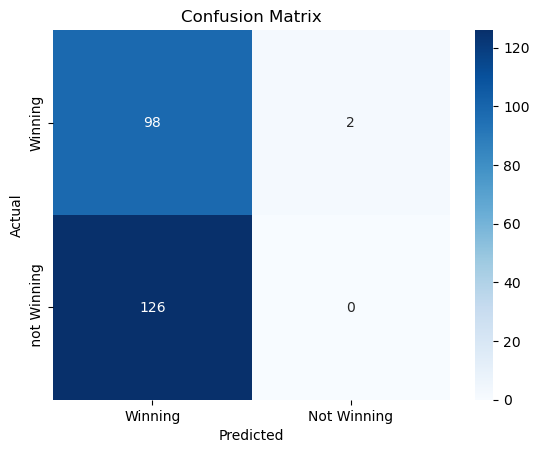

In [194]:
#Visualize the confusion matrix 
sns.heatmap(conf_matrix, annot= True, fmt = 'd', cmap = 'Blues', xticklabels=['Winning','Not Winning' ], yticklabels=['Winning',' not Winning'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [192]:
#Print CLassification report
class_report = classification_report(Y_test, y_pred, target_names=['Lost', 'Won'])
print(class_report)

              precision    recall  f1-score   support

        Lost       0.44      0.98      0.60       100
         Won       0.00      0.00      0.00       126

    accuracy                           0.43       226
   macro avg       0.22      0.49      0.30       226
weighted avg       0.19      0.43      0.27       226

